<a href="https://colab.research.google.com/github/Rino04/Football-Prediction/blob/main/Final_Jack_Week_6_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

## 1. Defining the Question

### a) Specifying the Question


> We have been recruited as football analysts by Mchezopesa Ltd to predict results of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly.



### b) Defining the Metric for Success




For this analysis to be considered successful, we must be able to create an effective model that will be able to:

1. Perform EDA.
2. Predict how many goals the home team scores.
3. Predict how many goals the away team scores.
4. Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)
5. Achieve an RMSE score that is less than 10% of the target mean
6. Achieve a high accuracy  score

### c) Understanding the context 

The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium.[1] The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest.

A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.Since 16 August 2018, the current version of the ranking system has adopted the Elo rating system used in chess and Go.

### d) Recording the Experimental Design

he following steps will be followed in conducting this analysis:

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Merging the Dataframes
6. Performing EDA
7. Prediction Models
8. Evaluation of the solution
9. Challenging the solution
10. Conclusion

## IMPORTING LIBRARIES 

In [1]:
# libraries for reading the dataset & data cleaning
import pandas as pd
import numpy as np

#libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#libraries to use in modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

#libraries for metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# let us set the warnings that may appear in our analysis off
import warnings
warnings.filterwarnings('ignore') 

## LOADING THE DATASET AND PREVIEWING

In [2]:
#Load both datasets
fifarank=pd.read_csv('/content/fifa_ranking.csv')
results=pd.read_csv('/content/results.csv')

### Fifa Ranking

In [3]:
#we will look for the shape of the dataframe
print('fifaranking dataset has ' + str(fifarank.shape[0]) + ' rows and ' + str(fifarank.shape[1]) + ' columns' )

fifaranking dataset has 57793 rows and 16 columns


In [4]:
#we will check the dtypes of the dataset
print(' column names, number of observations dtypes of the columns')
print('\n')
fifarank.dtypes

 column names, number of observations dtypes of the columns




rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [5]:
#first 5 rows of the dataset
fifarank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
#preview the tail
fifarank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


### Results DataFrame

In [7]:
print('results dataset has ' + str(results.shape[0]) + ' rows and ' + str(results.shape[1]) +' columns')

results dataset has 40839 rows and 9 columns


In [8]:
#preview the head
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [9]:
#preview the tail
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [10]:
print(' column names, number of observations dtypes of the columns')
print('\n')
results.info()

 column names, number of observations dtypes of the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


# DATA CLEANING

### FifaRankings DataFrame

#### Consistency

In [11]:
#we will look for the number of rows with duplicate records
print('Number of rows with duplicated values',fifarank.duplicated().sum())

#we then drop the rows with duplicated records
fifarank.drop_duplicates(inplace=True)
print('After dropping there are',fifarank.duplicated().sum(), "Duplicated rows")

print('Shape of dataframe after dropping duplicated rows', fifarank.shape)

Number of rows with duplicated values 37
After dropping there are 0 Duplicated rows
Shape of dataframe after dropping duplicated rows (57756, 16)


#### Completness

In [12]:
#look for columns with missing values
fifarank.isna().sum()
#There are no null values in our dataset

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

#### Uniformity

In [13]:
# we will rename the columns into a uniform naming convention
fifarank.columns=fifarank.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')

#rename the rank_date into date
fifarank.rename(columns={'rank_date':'date'},inplace=True)
#confirm if the code above has been implemented
fifarank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date'],
      dtype='object')

#### Validity

In [14]:
#converting the dtype of the column date from object to datetime
fifarank['date']=pd.to_datetime(fifarank['date'],infer_datetime_format=True)

In [15]:
#create a new column with year values
fifarank['year'] = fifarank.date.dt.year
fifarank['month'] = fifarank.date.dt.month

In [16]:
#Drop irrelevant columns
fifarank.drop(['country_abrv','total_points','previous_points','cur_year_avg',
           'cur_year_avg_weighted', 'last_year_avg','last_year_avg_weighted','two_year_ago_avg',
           'two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted', 'date'], axis = 1, inplace = True)

# let us confirm that we have dropped the unnecessary columns
fifarank.head()

,rank,country_full,rank_change,confederation,year,month
0,1,Germany,0,UEFA,1993,8
1,2,Italy,0,UEFA,1993,8
2,3,Switzerland,9,UEFA,1993,8
3,4,Sweden,0,UEFA,1993,8
4,5,Argentina,5,CONMEBOL,1993,8


### Results DataFrame

#### Consistency

In [17]:
#check for rows with duplicated records
results.duplicated().sum()
#There are no duplicated rows

0

#### Completness

In [18]:
#check for columns with missing values
results.isna().sum()
#There are no missing values

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

#### Validity

In [19]:
#convert the date from object class into datetime
results['date']=pd.to_datetime(results['date'], infer_datetime_format=True)

In [20]:
#create another column with year values only
results['year'] = results.date.dt.year
results['month'] = results.date.dt.month

In [21]:
#drop irrelevant columns
results.drop(['city', 'date'], axis = 1, inplace = True)
# preview to check if dropped
results.head()

,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month
0,Scotland,England,0,0,Friendly,Scotland,False,1872,11
1,England,Scotland,4,2,Friendly,England,False,1873,3
2,Scotland,England,2,1,Friendly,Scotland,False,1874,3
3,England,Scotland,2,2,Friendly,England,False,1875,3
4,Scotland,England,3,0,Friendly,Scotland,False,1876,3


#### Uniformity

In [22]:
#Renaming to uniform naming convections 
results.columns=results.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
results.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country', 'neutral', 'year', 'month'],
      dtype='object')

In [23]:
results.head()

,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month
0,Scotland,England,0,0,Friendly,Scotland,False,1872,11
1,England,Scotland,4,2,Friendly,England,False,1873,3
2,Scotland,England,2,1,Friendly,Scotland,False,1874,3
3,England,Scotland,2,2,Friendly,England,False,1875,3
4,Scotland,England,3,0,Friendly,Scotland,False,1876,3


## Merging the dataset

### Merge to get Home Rank

In [24]:
#We shall take country full from the fifarank as the home team country
#Renaming it to home_team
fifarank.rename(columns={'country_full': 'home_team'}, inplace=True)
fifarank.columns

Index(['rank', 'home_team', 'rank_change', 'confederation', 'year', 'month'], dtype='object')

In [25]:
#merging on home team and year since there are similiar
home=pd.merge(fifarank,results,  how='right', on=['home_team','year', 'month'])
home.head()

,rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,country,neutral
0,NaN,Scotland,NaN,NaN,1872,11,England,0,0,Friendly,Scotland,False
1,NaN,England,NaN,NaN,1873,3,Scotland,4,2,Friendly,England,False
2,NaN,Scotland,NaN,NaN,1874,3,England,2,1,Friendly,Scotland,False
3,NaN,England,NaN,NaN,1875,3,Scotland,2,2,Friendly,England,False
4,NaN,Scotland,NaN,NaN,1876,3,England,3,0,Friendly,Scotland,False


In [26]:
#lets check the shape and compare with parent datasets
print(fifarank.shape)
print(results.shape)
print(home.shape)

(57756, 6)
(40839, 9)
(40892, 12)


In [27]:
#Check for null values
home.isnull().sum()

rank             22299
home_team            0
rank_change      22299
confederation    22299
year                 0
month                0
away_team            0
home_score           0
away_score           0
tournament           0
country              0
neutral              0
dtype: int64

In [28]:
# Let us drop these null values
home.dropna(inplace=True)
home.isnull().sum()

rank             0
home_team        0
rank_change      0
confederation    0
year             0
month            0
away_team        0
home_score       0
away_score       0
tournament       0
country          0
neutral          0
dtype: int64

In [29]:
#Check the shape
home.shape

(18593, 12)

### Merge to get Away Rank

In [30]:
#We shall take country full from the fifarank as the away team country
#Renaming it to away_team
fifarank.rename(columns={'home_team': 'away_team'}, inplace=True)
fifarank.columns

Index(['rank', 'away_team', 'rank_change', 'confederation', 'year', 'month'], dtype='object')

In [31]:
#merging on home team and year since there are similiar
away=pd.merge(fifarank,results,  how='right', on=['away_team','year', 'month'])
away.head()

,rank,away_team,rank_change,confederation,year,month,home_team,home_score,away_score,tournament,country,neutral
0,NaN,England,NaN,NaN,1872,11,Scotland,0,0,Friendly,Scotland,False
1,NaN,Scotland,NaN,NaN,1873,3,England,4,2,Friendly,England,False
2,NaN,England,NaN,NaN,1874,3,Scotland,2,1,Friendly,Scotland,False
3,NaN,Scotland,NaN,NaN,1875,3,England,2,2,Friendly,England,False
4,NaN,England,NaN,NaN,1876,3,Scotland,3,0,Friendly,Scotland,False


In [32]:
#lets check the shape and compare with parent datasets
print(fifarank.shape)
print(results.shape)
print(away.shape)

(57756, 6)
(40839, 9)
(40891, 12)


In [33]:
#Check for null values
away.isnull().sum()

rank             22389
away_team            0
rank_change      22389
confederation    22389
year                 0
month                0
home_team            0
home_score           0
away_score           0
tournament           0
country              0
neutral              0
dtype: int64

In [34]:
# Let us drop these null values
away.dropna(inplace=True)
away.isnull().sum()

rank             0
away_team        0
rank_change      0
confederation    0
year             0
month            0
home_team        0
home_score       0
away_score       0
tournament       0
country          0
neutral          0
dtype: int64

In [35]:
#Check the shape
away.shape

(18502, 12)

### Merging the away and home 

In [36]:
#We shall take country full from the fifarank as the away team country
#Renaming it to away_team
df = pd.merge(home, away, how = 'inner', left_on = ['year', 'month','away_team'],
              right_on = ['year', 'month','away_team'])
df.head()

,rank_x,home_team_x,rank_change_x,confederation_x,year,month,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,rank_y,rank_change_y,confederation_y,home_team_y,home_score_y,away_score_y,tournament_y,country_y,neutral_y
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,67.0,1.0,CONMEBOL,Colombia,0,0,FIFA World Cup qualification,Colombia,False
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,67.0,1.0,CONMEBOL,Argentina,0,0,FIFA World Cup qualification,Argentina,False
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,67.0,1.0,CONMEBOL,Colombia,0,0,FIFA World Cup qualification,Colombia,False
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,67.0,1.0,CONMEBOL,Argentina,0,0,FIFA World Cup qualification,Argentina,False
4,19.0,Colombia,16.0,CONMEBOL,1993,8,Argentina,2,1,FIFA World Cup qualification,Colombia,False,5.0,5.0,CONMEBOL,Peru,0,1,FIFA World Cup qualification,Peru,False


In [37]:
#Check for null values
df.isnull().sum()

rank_x             0
home_team_x        0
rank_change_x      0
confederation_x    0
year               0
month              0
away_team          0
home_score_x       0
away_score_x       0
tournament_x       0
country_x          0
neutral_x          0
rank_y             0
rank_change_y      0
confederation_y    0
home_team_y        0
home_score_y       0
away_score_y       0
tournament_y       0
country_y          0
neutral_y          0
dtype: int64

In [38]:
#Check the shape
df.shape

(28439, 21)

In [39]:
# let us rename our columns
df.rename(columns={'home_team_x':'home_team',
                   'rank_change_x':'rank_change',
                   'confederation_x':'confederation',
                   'home_score_x':'home_score',
                   'away_score_x':'away_score',
                   'tournament_x':'tournament',
                   'neutral_x':'neutral',
                   'rank_x':'home_rank',
                   'rank_y':'away_rank'},
                   inplace=True)
df.head()

,home_rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,country_x,neutral,away_rank,rank_change_y,confederation_y,home_team_y,home_score_y,away_score_y,tournament_y,country_y,neutral_y
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,67.0,1.0,CONMEBOL,Colombia,0,0,FIFA World Cup qualification,Colombia,False
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,67.0,1.0,CONMEBOL,Argentina,0,0,FIFA World Cup qualification,Argentina,False
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,67.0,1.0,CONMEBOL,Colombia,0,0,FIFA World Cup qualification,Colombia,False
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,67.0,1.0,CONMEBOL,Argentina,0,0,FIFA World Cup qualification,Argentina,False
4,19.0,Colombia,16.0,CONMEBOL,1993,8,Argentina,2,1,FIFA World Cup qualification,Colombia,False,5.0,5.0,CONMEBOL,Peru,0,1,FIFA World Cup qualification,Peru,False


In [40]:
# Drop irrelevant columns
df.drop(columns= ['country_x','rank_change_y','confederation_y', 'home_team_y','home_score_y','away_score_y','tournament_y','country_y','neutral_y'], inplace=True)
df.head()

,home_rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,neutral,away_rank
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0
4,19.0,Colombia,16.0,CONMEBOL,1993,8,Argentina,2,1,FIFA World Cup qualification,False,5.0


In [41]:
df.shape

(28439, 12)

## Features Engineering

In [42]:
#Lets create a columns to hold the status of team; either a win, loss or draw
df['goal_diff']=df['home_score']-df['away_score']
df.head()

,home_rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,neutral,away_rank,goal_diff
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0
4,19.0,Colombia,16.0,CONMEBOL,1993,8,Argentina,2,1,FIFA World Cup qualification,False,5.0,1


In [43]:
#win, loss, draw
status=[]
for i in df['goal_diff']:
  if i > 0:
    status.append('win')
  elif i==0:
    status.append('draw')
  else:
    status.append('loss')

df['status']= status
df.head()

,home_rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,neutral,away_rank,goal_diff,status
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0,draw
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0,draw
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0,draw
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0,draw
4,19.0,Colombia,16.0,CONMEBOL,1993,8,Argentina,2,1,FIFA World Cup qualification,False,5.0,1,win


In [44]:
#Redifining the tournaments variables
df.tournament.unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament',
       'CFU Caribbean Cup qualification', 'African Cup of Nations',
       'CFU Caribbean Cup', 'UEFA Euro qualification', 'Kirin Cup',
       'FIFA World Cup', 'Oceania Nations Cup qualification',
       'Baltic Cup', 'Gulf Cup', 'Simba Tournament', 'CECAFA Cup',
       'Dynasty Cup', "King's Cup", 'SAFF Cup', 'Copa Paz del Chaco',
       'Korea Cup', 'USA Cup', 'Copa América', 'Merdeka Tournament',
       'South Pacific Games', 'UNCAF Cup', 'Oceania Nations Cup',
       'Windward Islands Tournament', 'AFC Asian Cup qualification',
       'Gold Cup', 'Lunar New Year Cup', 'AFF Championship',
       'AFC Asian Cup', 'King Hassan II Tournament', 'Dunhill Cup',
       'Cyprus International Tournament', 'Nehru Cup', 'COSAFA Cup',
       'Tournoi de France', 'Confederations Cup',

In [45]:
#We shall only pick variables of world cup and friendly and name the rest as others
def tournment_type(i):
  if i == 'FIFA World Cup':
    return 'World Cup'
  elif i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

df['tournament'] = df.tournament.apply(lambda x: tournment_type(x))
#Check for unique 
df.tournament.unique()

array(['Other', 'Friendly', 'World Cup'], dtype=object)

## Exporting our clean data

In [46]:
df.to_csv('fifarank.csv')

## Exploratory Data Analysis

### Univariate Analysis

In [47]:
#We shall visulize the statistical summaries of our data
df.describe()

,home_rank,rank_change,year,month,home_score,away_score,away_rank,goal_diff
count,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000
mean,78.387813,1.106052,2006.179437,6.720841,1.596821,1.101445,81.409192,0.495376
std,51.097232,7.029156,6.844128,3.357881,1.635258,1.279389,52.575171,2.232646
min,1.000000,-62.000000,1993.000000,1.000000,0.000000,0.000000,1.000000,-15.000000
25%,35.000000,-2.000000,2000.000000,4.000000,0.000000,0.000000,38.000000,-1.000000
50%,73.000000,0.000000,2006.000000,6.000000,1.000000,1.000000,76.000000,0.000000
75%,114.000000,3.000000,2012.000000,10.000000,2.000000,2.000000,119.000000,2.000000
max,209.000000,73.000000,2018.000000,12.000000,31.000000,15.000000,209.000000,31.000000


In [48]:
df.columns

Index(['home_rank', 'home_team', 'rank_change', 'confederation', 'year',
       'month', 'away_team', 'home_score', 'away_score', 'tournament',
       'neutral', 'away_rank', 'goal_diff', 'status'],
      dtype='object')

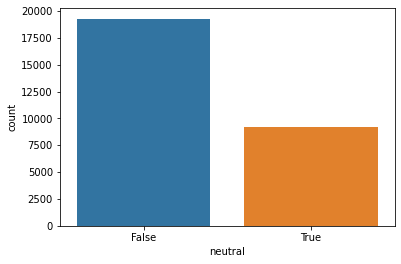

In [49]:
#Visulize how any games were played in neautral grounds
sns.countplot(df['neutral'])
#Most games were played in eaither home grounds or away grounds

Text(0.5, 1.0, 'A Pie chart of Tournaments played')

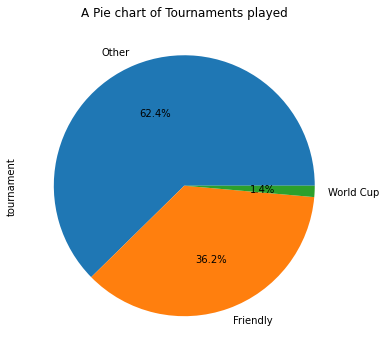

In [50]:
#Visulize the how many games were world cup games
df['tournament'].value_counts().plot(kind= 'pie', figsize=[6,6], autopct = '%1.1f%%')
plt.title('A Pie chart of Tournaments played')

Text(0.5, 1.0, 'A Pie chart of Results of the Match')

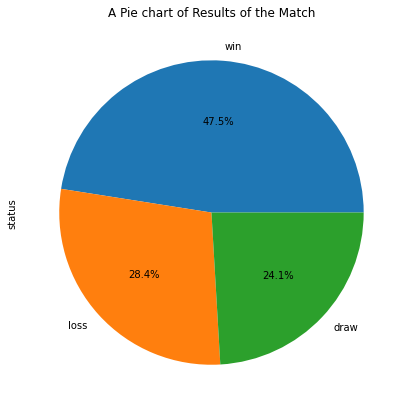

In [51]:
#Visulizing to Results
df['status'].value_counts().plot(kind= 'pie', figsize=[7,7], autopct = '%1.1f%%')
plt.title('A Pie chart of Results of the Match') 
# Most matches played ended up with wins(48.6%)

Text(0.5, 1.0, 'Confederations')

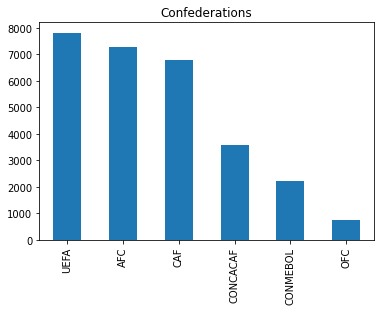

In [52]:
# Bar graph showing confederations
df.confederation.value_counts().head(10).plot.bar()
plt.title('Confederations')
# UEFA Confederations are the highest games in our dataset.

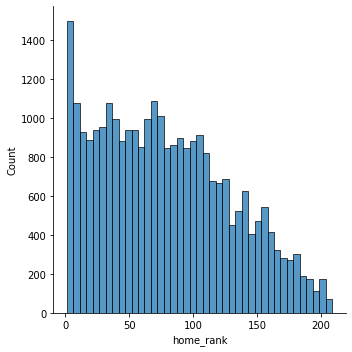

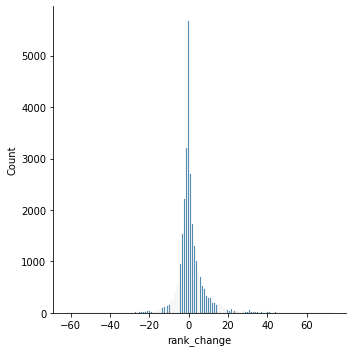

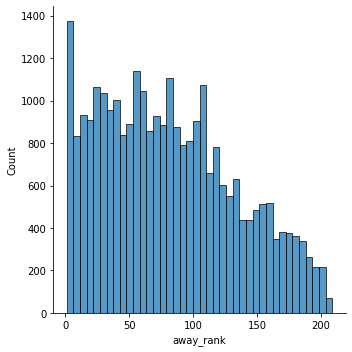

In [53]:
#Visulizing the distributions
numerical=df.select_dtypes(include=['int64','Float64'])
cols=numerical.columns

#fig, axes = plt.subplots(2, 3, figsize=(18, 10))
#fig.suptitle('Distribution of Numerical Data')
for i in cols:
  sns.displot(df[i])

### Bivarient Analysis

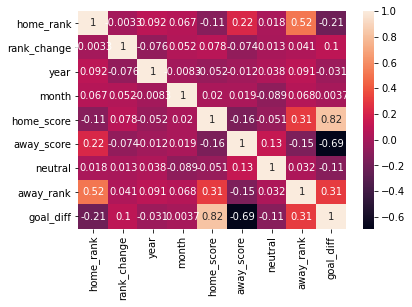

In [54]:
#Check for correlation
corr=df.corr()
sns.heatmap(corr, annot=True)
#There is correlation between columns in our dataset.
# However, the correlation is not high except for home score and goal difference

In [55]:
#Getting the year where more goals were scored by home teams
df.groupby('year')['home_score'].sum().sort_values(ascending=False).head()
#Most home goals were scored in 2001.

year
2001    3028
2000    2718
2004    2464
2008    2411
2011    2116
Name: home_score, dtype: int64

In [56]:
#Getting the year where more goals were scored by away teams
df.groupby('year')['away_score'].sum().sort_values(ascending=False).head()
#Most away goals were scored in 2004 followed by 2011.

year
2004    1818
2001    1777
2007    1635
2000    1618
2008    1587
Name: away_score, dtype: int64

### Multivarient Analysis

In [57]:
df.head()

,home_rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,neutral,away_rank,goal_diff,status
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,Other,False,67.0,0,draw
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,Other,False,67.0,0,draw
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,Other,False,67.0,0,draw
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,Other,False,67.0,0,draw
4,19.0,Colombia,16.0,CONMEBOL,1993,8,Argentina,2,1,Other,False,5.0,1,win


In [58]:
#Encoding using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.home_team=le.fit_transform(df.home_team)
df.away_team=le.fit_transform(df.away_team)
df.tournament=le.fit_transform(df.tournament)
df.neutral=le.fit_transform(df.neutral)
df.status=le.fit_transform(df.status)

In [59]:
df.columns

Index(['home_rank', 'home_team', 'rank_change', 'confederation', 'year',
       'month', 'away_team', 'home_score', 'away_score', 'tournament',
       'neutral', 'away_rank', 'goal_diff', 'status'],
      dtype='object')

#### 1. Results of the match

In [60]:
#We shall apply Linear Discriminate Analysis
#Status
#define x and y
x=df[['home_rank', 'home_team', 'rank_change', 'year',
       'month', 'away_team', 'home_score', 'away_score', 'tournament',
       'neutral', 'away_rank', 'goal_diff']]
y=df['status']

#Perorming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
lda_=lda.fit(x,y)
lda_x=lda_.transform(x)
lda_.coef_

array([[ 1.19518085e-03,  4.49612075e-04, -7.53918793e-03,
        -3.99750061e-04,  5.73118910e-03, -3.42851714e-04,
        -2.87787110e-01, -2.62608747e-01, -1.43362257e-01,
         6.72817207e-02, -1.83960346e-03, -1.23163124e-01],
       [ 6.34916904e-03,  1.88905064e-04, -2.54323581e-02,
         5.34929282e-03, -1.72948150e-02,  1.25102506e-04,
        -2.61171675e-01,  1.00637124e+00,  2.40608881e-01,
         9.10941959e-02, -5.84757488e-03, -7.21106179e-01],
       [-4.40274150e-03, -3.40777537e-04,  1.90299117e-02,
        -2.99666566e-03,  7.43958553e-03,  9.88905774e-05,
         3.02007021e-01, -4.68817830e-01, -7.12627555e-02,
        -8.85688912e-02,  4.42926125e-03,  4.93667390e-01]])

In [61]:
#getting the columns names
result=pd.DataFrame(index=x.columns.values,data=lda_.coef_[0])
result.sort_values(0,ascending=False)

,0
neutral,0.067282
month,0.005731
home_rank,0.001195
home_team,0.000450
away_team,-0.000343
year,-0.000400
away_rank,-0.001840
rank_change,-0.007539
goal_diff,-0.123163
tournament,-0.143362


#### 2. Home Goals

In [62]:
# 2. Home Goals 
#We shall apply Linear Discriminate Analysis

#define x and y
x=df[['home_rank', 'home_team', 'rank_change', 'year',
       'month', 'away_team', 'status', 'away_score', 'tournament',
       'neutral', 'away_rank', 'goal_diff']]
y=df['home_score']

#Perorming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
lda_=lda.fit(x,y)
lda_x=lda_.transform(x)
lda_.coef_

array([[ 6.81912657e-03, -2.43635788e-04, -5.14670040e-03,
         1.22531322e-02, -1.28033835e-02,  2.33098782e-04,
        -1.13465730e+00,  2.37547714e-01,  3.23059725e-03,
         7.48126402e-03, -7.86059460e-03, -2.37547714e-01],
       [ 4.70762921e-05,  2.81588071e-04,  1.99555117e-03,
         4.11611993e-03, -6.52436975e-03,  2.99543271e-04,
        -4.37108053e-01,  8.04667422e-02, -6.51721720e-02,
        -2.58494718e-02, -1.78984447e-03, -8.04667422e-02],
       [-2.77329362e-03,  2.31059534e-04,  3.08601848e-03,
        -2.58945176e-03,  1.73050040e-03, -2.80192796e-04,
         7.07084777e-01, -3.26597957e-02, -6.69566388e-02,
         1.15601912e-02,  1.70590042e-03,  3.26597957e-02],
       [-5.44034271e-03, -4.21065918e-04,  4.34144224e-03,
        -9.20049820e-03,  3.30103173e-02,  2.54429815e-04,
         1.31008640e+00, -1.89031854e-01, -3.41235340e-02,
        -4.75882333e-02,  6.56077884e-03,  1.89031854e-01],
       [-6.80859766e-03, -2.55804163e-04, -4.4102594

In [63]:
#getting the columns names
result=pd.DataFrame(index=x.columns.values,data=lda_.coef_[0])
result.sort_values(0,ascending=False)

,0
away_score,0.237548
year,0.012253
neutral,0.007481
home_rank,0.006819
tournament,0.003231
away_team,0.000233
home_team,-0.000244
rank_change,-0.005147
away_rank,-0.007861
month,-0.012803


#### 3. Away Goals to be scored

In [64]:
#We shall apply Linear Discriminate Analysis

#define x and y
x=df[['home_rank', 'home_team', 'rank_change', 'year',
       'month', 'away_team', 'status', 'home_score', 'tournament',
       'neutral', 'away_rank', 'goal_diff']]
y=df['away_score']

#Perorming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
lda_=lda.fit(x,y)
lda_x=lda_.transform(x)
lda_.coef_

array([[-5.14610251e-03,  1.83359005e-04,  7.84896673e-03,
         6.21836113e-03, -8.48762979e-03,  1.66009759e-04,
         2.04202003e-01,  1.02322261e-01, -3.31683896e-02,
        -2.62851937e-01,  4.60259027e-03,  1.02322261e-01],
       [-8.93703360e-04, -1.83639522e-04,  2.12367531e-03,
         5.97182975e-04, -3.63751203e-03,  1.73996640e-04,
        -2.64757391e-01,  3.73384547e-02, -2.25479867e-02,
        -9.56427700e-03, -8.62220751e-05,  3.73384547e-02],
       [ 4.47330819e-03, -2.05665232e-04, -9.72884160e-03,
        -3.86064144e-03,  1.29051803e-02, -1.14634621e-04,
        -2.85019855e-01, -6.04533250e-02, -1.03973320e-01,
         3.12684763e-01, -4.87516562e-03, -6.04533250e-02],
       [ 9.52051355e-03,  2.92797833e-04, -1.89908340e-02,
        -9.36383250e-03,  1.26256649e-02, -7.99649917e-04,
         1.57647357e-01, -2.14019302e-01,  2.11888119e-01,
         2.92937260e-01, -8.37675115e-03, -2.14019302e-01],
       [ 1.46841655e-02,  1.09614521e-03, -1.3078421

In [65]:
#getting the columns names
result=pd.DataFrame(index=x.columns.values,data=lda_.coef_[0])
result.sort_values(0,ascending=False)
## 

,0
status,0.204202
home_score,0.102322
goal_diff,0.102322
rank_change,0.007849
year,0.006218
away_rank,0.004603
home_team,0.000183
away_team,0.000166
home_rank,-0.005146
month,-0.008488


# Modelling

In [66]:
# creating a copy
data = df.copy()

### Polynomial Analysis

#### Predict Number of goals to be scored by home team

In [67]:
data.head()

,home_rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,neutral,away_rank,goal_diff,status
0,19.0,41,16.0,CONMEBOL,1993,8,137,0,0,1,0,67.0,0,0
1,19.0,41,16.0,CONMEBOL,1993,8,137,0,0,1,0,67.0,0,0
2,5.0,8,5.0,CONMEBOL,1993,8,137,0,0,1,0,67.0,0,0
3,5.0,8,5.0,CONMEBOL,1993,8,137,0,0,1,0,67.0,0,0
4,19.0,41,16.0,CONMEBOL,1993,8,8,2,1,1,0,5.0,1,2


In [68]:
#Variable to use are home rank, away rank and tournament
#Selecting dependent and independet variables
X=data[['home_rank', 'away_score', 'away_rank','tournament']]
y=data['home_score']

##### Multicollinearity

In [69]:
#gett the correlations 
correlations=X.corr()
correlations

,home_rank,away_score,away_rank,tournament
home_rank,1.000000,0.221365,0.515308,0.045492
away_score,0.221365,1.000000,-0.151487,0.041351
away_rank,0.515308,-0.151487,1.000000,0.069008
tournament,0.045492,0.041351,0.069008,1.000000


In [70]:
#checking for multicollinearity usibg VIF 
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
#all the VIF scores are below 5

,home_rank,away_score,away_rank,tournament
home_rank,1.556032,-0.477356,-0.874792,0.009320
away_score,-0.477356,1.172762,0.427528,-0.056283
away_rank,-0.874792,0.427528,1.521270,-0.082863
tournament,0.009320,-0.056283,-0.082863,1.007622


##### Building our model

In [71]:
#Spliting data into train and test
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
# Fit polynomial Regression 
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#prediction
y_pred = pol_reg.predict(X_poly)
y_pred

array([2.10201303, 2.10201303, 2.50458177, ..., 1.65533329, 1.25798034,
       1.25798034])

In [72]:
#evaluating our model
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(rmse) 
#RMSE is low than the mean hence its a good model

1.4210859033658023


##### Cross Validation

In [73]:
from sklearn.model_selection import KFold
X=data[['home_rank', 'away_score', 'away_rank','tournament']].values
y=data['home_score'].values
folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.508214927616083

Training model 2
Model 2 Root Mean Squared Error: 1.7119362400466442

Training model 3
Model 3 Root Mean Squared Error: 1.3892485217453652

Training model 4
Model 4 Root Mean Squared Error: 1.355736793440984

Training model 5
Model 5 Root Mean Squared Error: 1.3485048919616804


##### Residual plots and Bartlett's test

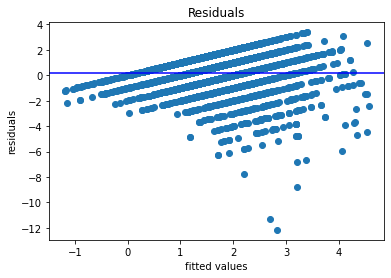

In [74]:
# Checking for Residuals in our predicted values
residuals_home = y_pred - y_test

# Plotting the prediction errors
plt.scatter(y_pred, residuals_home)
plt.title('Residuals')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y= residuals_home.mean(), color='blue')
plt.show()

# There are residuals are close to the mean hence our model is quite good.

In [75]:
#bartletts test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals_home)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


#### Predict Number of goals to be scored by away team

In [76]:
#Variable to use are home rank, away rank and tournament
#Selecting dependent and independet variables
away_X=data[['home_rank', 'away_score', 'away_rank','tournament']]
away_y=data['away_score']

##### Multicollinearity

In [77]:
#gett the correlations 
away_corr=away_X.corr()
away_corr

,home_rank,away_score,away_rank,tournament
home_rank,1.000000,0.221365,0.515308,0.045492
away_score,0.221365,1.000000,-0.151487,0.041351
away_rank,0.515308,-0.151487,1.000000,0.069008
tournament,0.045492,0.041351,0.069008,1.000000


In [78]:
#checking for multicollinearity usibg VIF 
pd.DataFrame(np.linalg.inv(away_corr.values), index = away_corr.index, columns=away_corr.columns)
#all the VIF scores are below 5

,home_rank,away_score,away_rank,tournament
home_rank,1.556032,-0.477356,-0.874792,0.009320
away_score,-0.477356,1.172762,0.427528,-0.056283
away_rank,-0.874792,0.427528,1.521270,-0.082863
tournament,0.009320,-0.056283,-0.082863,1.007622


##### Building our model

In [79]:
#Spliting data into train and test
X_train, y_train, X_test, y_test = train_test_split(away_X,away_y, test_size = 0.2, random_state=0)
# Fit polynomial Regression 
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#prediction
y_pred = pol_reg.predict(X_poly)
y_pred

array([2.10201303, 2.10201303, 2.50458177, ..., 1.65533329, 1.25798034,
       1.25798034])

In [80]:
#evaluating our model
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(rmse) 

1.4210859033658023


##### Cross Validation

In [81]:
from sklearn.model_selection import KFold
X = away_X.values
y = away_y.values
folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 9.3321925497542e-15

Training model 2
Model 2 Root Mean Squared Error: 1.091421221781599e-14

Training model 3
Model 3 Root Mean Squared Error: 6.536969835325406e-15

Training model 4
Model 4 Root Mean Squared Error: 5.045053665100356e-15

Training model 5
Model 5 Root Mean Squared Error: 7.114549955024732e-15


##### Residual plots and Bartlett's test

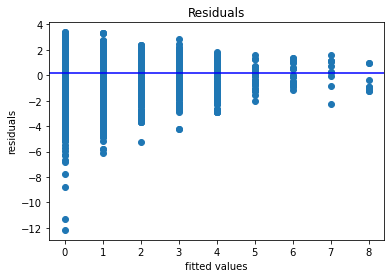

In [82]:
# Checking for Residuals in our predicted values
residuals_away= y_pred - y_test

# Plotting the prediction errors
plt.scatter(y_pred, residuals_home)
plt.title('Residuals')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y= residuals_home.mean(), color='blue')
plt.show()



In [83]:
#bartletts test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals_away)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## Logistic regression

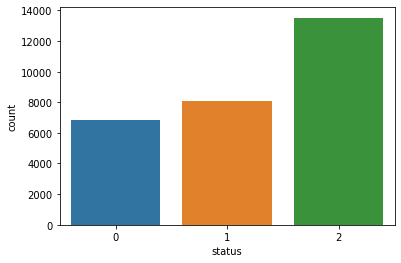

In [84]:
#Check for class imbalance in our target variable
sns.countplot(data['status'])

### Builing and Evaluating the Model

In [85]:
data.head()

,home_rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,neutral,away_rank,goal_diff,status
0,19.0,41,16.0,CONMEBOL,1993,8,137,0,0,1,0,67.0,0,0
1,19.0,41,16.0,CONMEBOL,1993,8,137,0,0,1,0,67.0,0,0
2,5.0,8,5.0,CONMEBOL,1993,8,137,0,0,1,0,67.0,0,0
3,5.0,8,5.0,CONMEBOL,1993,8,137,0,0,1,0,67.0,0,0
4,19.0,41,16.0,CONMEBOL,1993,8,8,2,1,1,0,5.0,1,2


In [86]:
#defining our dependent and independent variable
X=data[['home_rank','away_rank', 'rank_change', 'home_score', 'away_score','neutral']]
y=data["status"]

In [87]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Fitting our model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
y_pred = LogReg.predict(X_test)
y_pred

array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

In [88]:
#Evaluating our model using confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1318,    0,    0],
       [   0, 1673,    0],
       [   0,    0, 2697]])

In [89]:
# Measuring the accuracy of the model
from sklearn.metrics import accuracy_score
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')

The accuracy of the model is 1.0


#### Residuals

9168     0
2431     0
18148    0
427      0
10962    0
        ..
11396    0
3550     0
12606    0
15779    0
23579    0
Name: status, Length: 5688, dtype: int64


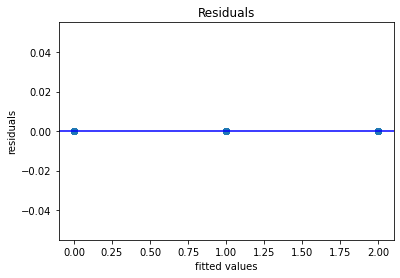

In [90]:
# Checking for Residuals in our predicted values
residuals = y_pred - y_test
print(residuals)
# Plotting the prediction errors
plt.scatter(y_pred, residuals)
plt.title('Residuals')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='blue')
plt.show()

# There are no residuals

#### Bartlett's test

In [91]:
#We shall do bartlett's test to check for homoginity of the variance
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)
# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')
  #We have identifyed no patterns hence we accept the null hypothesis and conclude that the variances are homogenous

inf
the variances are homogeneous!


### Hyperparameter testing

**Random Search**

In [92]:
#Import the libraries
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# define model
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)

distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distributions, random_state=0)

search = clf.fit(X,y)

search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [93]:
#Random Search
# specify parameters and distributions to sample from
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Step 2: Instantiating RandomizedSearchCV object 
from sklearn.model_selection import RandomizedSearchCV 
classifier = RandomForestClassifier(n_estimators=300, random_state=0)
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5) 

# Step 3: Calling the fit method
random_sr.fit(X_train, y_train)

# Step 4: Checking the parameters that return the highest accuracy
best_parameters = random_sr.best_params_
print("Best parameters are:",best_parameters)

# Finding the obtained accuracy
best_result = random_sr.best_score_
print("Best Results:",best_result)

Best parameters are: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_split': 5}
Best Results: 0.9998681415266782


# Challenge your Solution

1. Did we have the right data?

 Yes we did because it has the information we need to do our predictons.

2. Do we need more data for analysis?

 Yes we need more data. Player  performance per team greatly influences the performance of the team. Some countries have great players. 



# Conclusion

We were able to analyse our dataset and come up with both predictive analysis and logistic analysis.For the polynomial regression model, the rmse were lowwer than the mean hence the models were good.From our logistic analysis, we came up with with a model with 100% level of accurancy. 